In [5]:
import numpy as np
import matplotlib.pyplot as plt
from RKadaptivemultieq import *
import time

In [6]:
#this is the diffeq that does the affect of body b on a
def Fab(ra,rb,t,mb,G=1): #where ra is the vector (x,y,vx,vy) for body a and rb is for body b
    dx=rb[0]-ra[0]
    dy=rb[1]-ra[1]
    
    vx=ra[2]
    vy=ra[3]
    
    R=(dx**2+dy**2)**0.5

    ax=G*mb*dx/(R**3)
    ay=G*mb*dy/(R**3)
    
    return np.array([vx,vy,ax,ay],float)

In [7]:
def diffeq(state,t,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    return np.concatenate([dr1,dr2,dr3])

In [8]:
# R01=np.array([-1,0,0.3471168881,0.5327249454])
# R02=np.array([1,0,0.3471168881,0.5327249454])
# R03=np.array([0,0,-0.6942337762,-1.0654498908])
# r1=np.concatenate([R01,R02,R03])

In [9]:
# np.concatenate((r1[0:2],r1[4:6],r1[8:10])) 

In [10]:
def errf(r1,r2):
    r1=np.concatenate((r1[0:2],r1[4:6],r1[8:10])) #we just want the positions
    r2=np.concatenate((r2[0:2],r2[4:6],r2[8:10]))
    return np.linalg.norm(r1-r2)

In [11]:
#this is the butterfly I sequence orbit 1.2.A
R01=np.array([-1,0,0.306893,0.125507])
R02=np.array([1,0,0.306893,0.125507])
R03=np.array([0,0.3133550361,-0.613786,-0.251014])
R0=np.concatenate([R01,R02,R03])

In [12]:
t_range=[0,7]

In [13]:
start=time.time()

In [14]:
#Ts,Rs=RK4adapt(diffeq,errf,R0,t_range,hstart=1e-6,tol=1e-12)

In [15]:
end=time.time()
total=end-start
print(total)

0.004166364669799805


In [16]:
# plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
# plt.plot(Rs[:,4],Rs[:,5],color='green')
# plt.plot(Rs[:,8],Rs[:,9],color='blue')
# plt.savefig('adaptive.png')

In [17]:
4773/60

79.55

In [18]:
#plt.savefig('adaptive.png')

In [19]:
R01=np.array([-1,0,0.3471168881,0.5327249454])
R02=np.array([1,0,0.3471168881,0.5327249454])
R03=np.array([0,0,-0.6942337762,-1.0654498908])
R0=np.concatenate([R01,R02,R03])

In [20]:
def errf2(r1,r2):
    r1=np.concatenate((r1[0:2],r1[4:6],r1[8:10])) #we just want the positions
    r2=np.concatenate((r2[0:2],r2[4:6],r2[8:10]))
    return np.max(np.abs(r1-r2))

In [21]:
start=time.time()

In [22]:
Ts,Rs=RK4adapt(diffeq,errf2,R0,(0,1),hstart=1e-6,tol=1e-12)

In [23]:
end=time.time()
total=end-start
print(total)

127.72209000587463


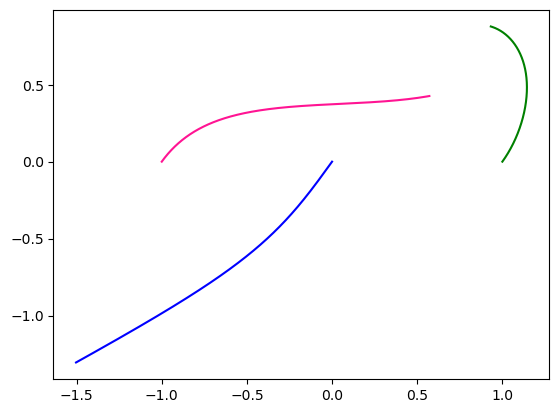

In [24]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.savefig('adaptive2.png')

In [49]:
start=time.time()
Ts2,Rs2=RK4adapt(diffeq,errf,R0,(0,1),hstart=1e-6,tol=1e-12)
end=time.time()
total=end-start
print(total)

127.10859680175781


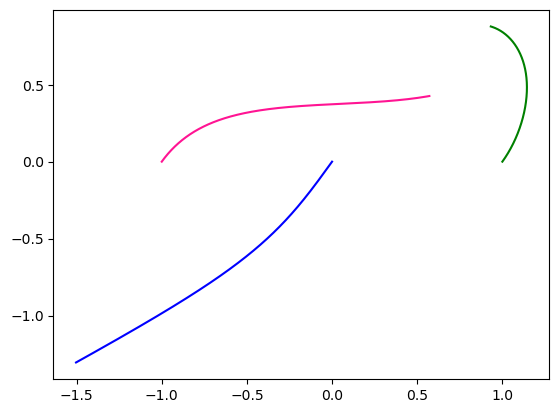

In [50]:
plt.plot(Rs2[:,0],Rs2[:,1],color='deeppink')
plt.plot(Rs2[:,4],Rs2[:,5],color='green')
plt.plot(Rs2[:,8],Rs2[:,9],color='blue')
plt.savefig('adaptive3.png')